In [2]:
%%bash
pip install -qU pip wheel setuptools
pip install -qU numpy pandas matplotlib scikit-learn seaborn

## Mini-Batch Gradient Descent

In [2]:
%%writefile data.csv
-0.72407,2.23863
-2.40724,-0.00156
2.64837,3.01665
0.36092,2.31019
0.67312,2.05950
-0.45460,1.24736
2.20168,2.82497
1.15605,2.21802
0.50694,1.43644
-0.85952,1.74980
-0.59970,1.63259
1.46804,2.43461
-1.05659,1.02226
1.29177,3.11769
-0.74565,0.81194
0.15033,2.81910
-1.49627,0.53105
-0.72071,1.64845
0.32924,1.91416
-0.28053,2.11376
-1.36115,1.70969
0.74678,2.92253
0.10621,3.29827
0.03256,1.58565
-0.98290,2.30455
-1.15661,1.79169
0.09024,1.54723
-1.03816,1.06893
-0.00604,1.78802
0.16278,1.84746
-0.69869,1.58732
1.03857,1.94799
-0.11783,3.09324
-0.95409,1.86155
-0.81839,1.88817
-1.28802,1.39474
0.62822,1.71526
-2.29674,1.75695
-0.85601,1.12981
-1.75223,1.67000
-1.19662,0.66711
0.97781,3.11987
-1.17110,0.56924
0.15835,2.28231
-0.58918,1.23798
-1.79678,1.35803
-0.95727,1.75579
0.64556,1.91470
0.24625,2.33029
0.45917,3.25263
1.21036,2.07602
-0.60116,1.54254
0.26851,2.79202
0.49594,1.96178
-2.67877,0.95898
0.49402,1.96690
1.18643,3.06144
-0.17741,1.85984
0.57938,1.82967
-2.14926,0.62285
2.27700,3.63838
-1.05695,1.11807
1.68288,2.91735
-1.53513,1.99668
0.00099,1.76149
0.45520,2.31938
-0.37855,0.90172
1.35638,3.49432
0.01763,1.87838
2.21725,2.61171
-0.44442,2.06623
0.89583,3.04041
1.30499,2.42824
0.10883,0.63190
1.79466,2.95265
-0.00733,1.87546
0.79862,3.44953
-0.12353,1.53740
-1.34999,1.59958
-0.67825,1.57832
-0.17901,1.73312
0.12577,2.00244
1.11943,2.08990
-3.02296,1.09255
0.64965,1.28183
1.05994,2.32358
0.53360,1.75136
-0.73591,1.43076
-0.09569,2.81376
1.04694,2.56597
0.46511,2.36401
-0.75463,2.30161
-0.94159,1.94500
-0.09314,1.87619
-0.98641,1.46602
-0.92159,1.21538
0.76953,2.39377
0.03283,1.55730
-1.07619,0.70874
0.20174,1.76894

Overwriting data.csv


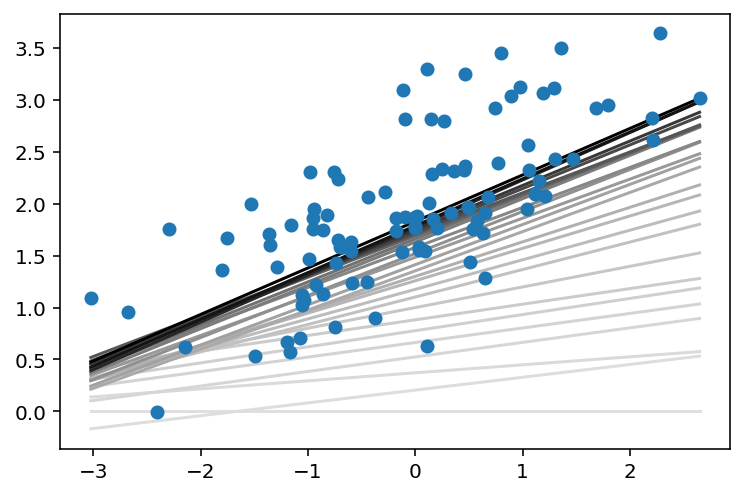

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)

# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Fill in code
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new

# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('data.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()

## Linear Regression in Scikit-learn

In [4]:
%%writefile bmi_and_life_expectancy.csv
Country,Life expectancy,BMI
Afghanistan,52.8,20.62058
Albania,76.8,26.44657
Algeria,75.5,24.59620
Andorra,84.6,27.63048
Angola,56.7,22.25083
Armenia,72.3,25.355420000000002
Australia,81.6,27.56373
Austria,80.4,26.467409999999997
Azerbaijan,69.2,25.65117
Bahamas,72.2,27.24594
Bangladesh,68.3,20.39742
Barbados,75.3,26.38439
Belarus,70.0,26.16443
Belgium,79.6,26.75915
Belize,70.7,27.02255
Benin,59.7,22.41835
Bhutan,70.7,22.82180
Bolivia,71.2,24.43335
Bosnia and Herzegovina,77.5,26.61163
Botswana,53.2,22.12984
Brazil,73.2,25.78623
Bulgaria,73.2,26.54286
Burkina Faso,58.0,21.27157
Burundi,59.1,21.50291
Cambodia,66.1,20.80496
Cameroon,56.6,23.68173
Canada,80.8,27.45210
Cape Verde,70.4,23.51522
Chad,54.3,21.48569
Chile,78.5,27.01542
China,73.4,22.92176
Colombia,76.2,24.94041
Comoros,67.1,22.06131
"Congo, Dem. Rep.",57.5,19.86692
"Congo, Rep.",58.8,21.87134
Costa Rica,79.8,26.47897
Cote d'Ivoire,55.4,22.56469
Croatia,76.2,26.59629
Cuba,77.6,25.06867
Cyprus,80.0,27.41899
Denmark,78.9,26.13287
Djibouti,61.8,23.38403
Ecuador,74.7,25.58841
Egypt,70.2,26.73243
El Salvador,73.7,26.36751
Eritrea,60.1,20.88509
Estonia,74.2,26.26446
Ethiopia,60.0,20.24700
Fiji,64.9,26.53078
Finland,79.6,26.73339
France,81.1,25.85329
French Polynesia,75.11,30.86752
Gabon,61.7,24.07620
Gambia,65.7,21.65029
Georgia,71.8,25.54942
Germany,80.0,27.16509
Ghana,62.0,22.84247
Greece,80.2,26.33786
Greenland,70.3,26.01359
Grenada,70.8,25.17988
Guatemala,71.2,25.29947
Guinea,57.1,22.52449
Guinea-Bissau,53.6,21.64338
Guyana,65.0,23.68465
Haiti,61.0,23.66302
Honduras,71.8,25.10872
Hungary,73.9,27.11568
Iceland,82.4,27.20687
India,64.7,20.95956
Indonesia,69.4,21.85576
Iran,73.1,25.31003
Iraq,66.6,26.71017
Ireland,80.1,27.65325
Israel,80.6,27.13151
Jamaica,75.1,24.00421
Japan,82.5,23.50004
Jordan,76.9,27.47362
Kazakhstan,67.1,26.29078
Kenya,60.8,21.59258
Kuwait,77.3,29.17211
Latvia,72.4,26.45693
Lesotho,44.5,21.90157
Liberia,59.9,21.89537
Libya,75.6,26.54164
Lithuania,72.1,26.86102
Luxembourg,81.0,27.43404
"Macedonia, FYR",74.5,26.34473
Madagascar,62.2,21.40347
Malawi,52.4,22.03468
Malaysia,74.5,24.73069
Maldives,78.5,23.21991
Mali,58.5,21.78881
Malta,80.7,27.68361
Marshall Islands,65.3,29.37337
Mauritania,67.9,22.62295
Mauritius,72.9,25.15669
Mexico,75.4,27.42468
Moldova,70.4,24.23690
Mongolia,64.8,24.88385
Montenegro,76.0,26.55412
Morocco,73.3,25.63182
Mozambique,54.0,21.93536
Myanmar,59.4,21.44932
Namibia,59.1,22.65008
Nepal,68.4,20.76344
Netherlands,80.3,26.01541
Nicaragua,77.0,25.77291
Niger,58.0,21.21958
Nigeria,59.2,23.03322
Norway,80.8,26.93424
Oman,76.2,26.24109
Pakistan,64.1,22.29914
Panama,77.3,26.26959
Papua New Guinea,58.6,25.01506
Paraguay,74.0,25.54223
Peru,78.2,24.77041
Philippines,69.8,22.87263
Poland,75.4,26.67380
Portugal,79.4,26.68445
Qatar,77.9,28.13138
Romania,73.2,25.41069
Russia,67.9,26.01131
Rwanda,64.1,22.55453
Samoa,72.3,30.42475
Sao Tome and Principe,66.0,23.51233
Senegal,63.5,21.92743
Serbia,74.3,26.51495
Sierra Leone,53.6,22.53139
Singapore,80.6,23.83996
Slovak Republic,74.9,26.92717
Slovenia,78.7,27.43983
Somalia,52.6,21.96917
South Africa,53.4,26.85538
Spain,81.1,27.49975
Sri Lanka,74.0,21.96671
Sudan,65.5,22.40484
Suriname,70.2,25.49887
Swaziland,45.1,23.16969
Sweden,81.1,26.37629
Switzerland,82.0,26.20195
Syria,76.1,26.91969
Tajikistan,69.6,23.77966
Tanzania,60.4,22.47792
Thailand,73.9,23.00803
Timor-Leste,69.9,20.59082
Togo,57.5,21.87875
Tonga,70.3,30.99563
Trinidad and Tobago,71.7,26.39669
Tunisia,76.8,25.15699
Turkey,77.8,26.70371
Turkmenistan,67.2,25.24796
Uganda,56.0,22.35833
Ukraine,67.8,25.42379
United Arab Emirates,75.6,28.05359
United Kingdom,79.7,27.39249
United States,78.3,28.45698
Uruguay,76.0,26.39123
Uzbekistan,69.6,25.32054
Vanuatu,63.4,26.78926
West Bank and Gaza,74.1,26.57750
Vietnam,74.1,20.91630
Zambia,51.1,20.68321
Zimbabwe,47.3,22.02660

Overwriting bmi_and_life_expectancy.csv


[[60.31564716]]


/home/meng/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


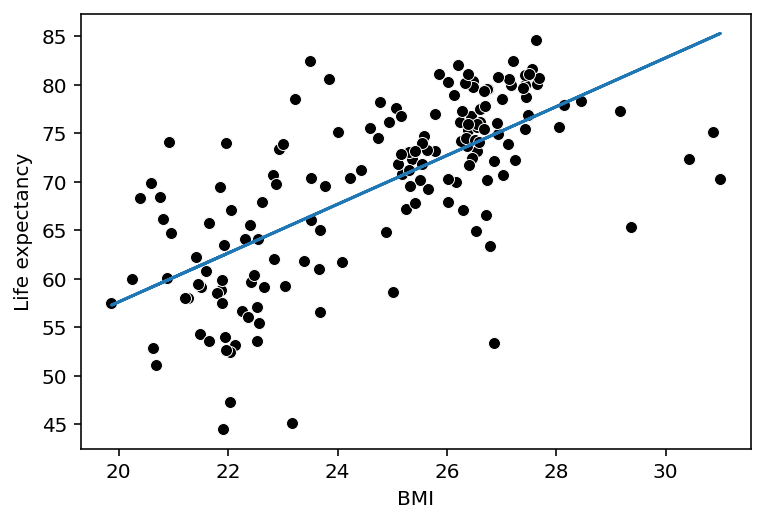

In [5]:
# TODO: Add import statements
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv')

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Make a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])
print(laos_life_exp)

predictions = bmi_life_model.predict(bmi_life_data[['BMI']])

plt.figure()
ax = sns.scatterplot(data=bmi_life_data, x='BMI', y='Life expectancy', color='black')
ax.plot(bmi_life_data[['BMI']], predictions)
plt.show()

## Multiple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and Assign it to the model variable
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)
print(prediction)

[23.68284712]


/home/meng/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

## Polynomial Regression

In [8]:
%%writefile data.csv
Var_X,Var_Y
-0.33532,6.66854
0.02160,3.86398
-1.19438,5.16161
-0.65046,8.43823
-0.28001,5.57201
1.93258,-11.13270
1.22620,-5.31226
0.74727,-4.63725
3.32853,3.80650
2.87457,-6.06084
-1.48662,7.22328
0.37629,2.38887
1.43918,-7.13415
0.24183,2.00412
-2.79140,4.29794
1.08176,-5.86553
2.81555,-5.20711
0.54924,-3.52863
2.36449,-10.16202
-1.01925,5.31123

Overwriting data.csv


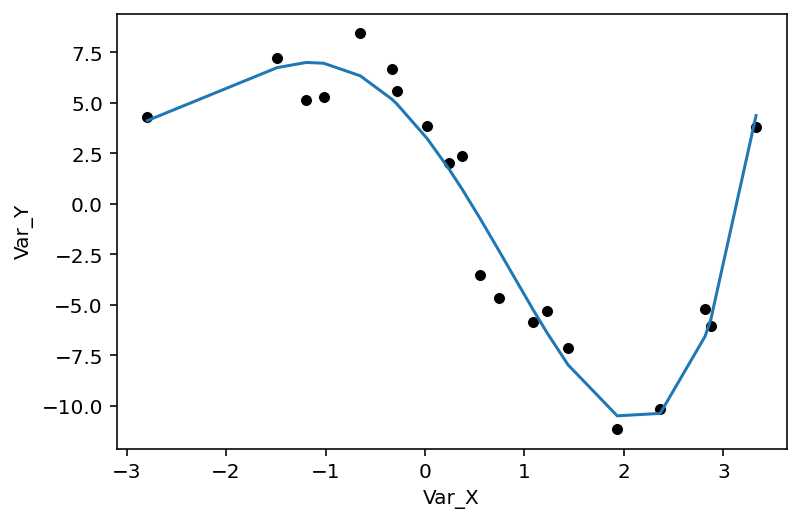

In [26]:
# TODO: Add import statements
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data.csv').sort_values('Var_X')
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

predictions = poly_model.predict(X_poly)

plt.figure()
ax = sns.scatterplot(data=train_data, x='Var_X', y='Var_Y', color='black')
ax.plot(X, predictions)
plt.show()

## Regularization

In [1]:
%%writefile data.csv
1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122
-2.86202,-0.84337,-1.08165,0.67115,-2.48911,0.52328,9.39789
-7.09328,-0.07233,6.76632,13.06072,0.12876,-0.01048,11.73565
-7.17614,0.62875,-2.89924,-5.21458,-2.70344,-0.22035,4.42482
8.67430,2.09933,-11.23591,-5.99532,-2.79770,-0.08710,-5.94615
-6.03324,-4.16724,2.42063,-3.61827,1.96815,0.17723,-13.11848
8.67485,1.48271,-1.31205,-1.81154,2.67940,0.04803,-9.25647
4.36248,-2.69788,-4.60562,-0.12849,3.40617,-0.07841,-29.94048
9.97205,-0.61515,2.63039,2.81044,5.68249,-0.04495,-20.46775
-1.44556,0.18337,4.61021,-2.54824,0.86388,0.17696,7.12822
-3.90381,0.53243,2.83416,-5.42397,-0.06367,-0.22810,6.05628
-12.39824,-1.54269,-2.66748,10.82084,5.92054,0.13415,-32.91328
5.75911,-0.82222,10.24701,0.33635,0.26025,-0.02588,17.75036
-7.12657,3.28707,-0.22508,13.42902,2.16708,-0.09153,-2.80277
7.22736,1.27122,0.99188,-8.87118,-6.86533,0.09410,33.98791
-10.31393,2.23819,-7.87166,-3.44388,-1.43267,-0.07893,-3.18407
-8.25971,-0.15799,-1.81740,1.12972,4.24165,-0.01607,-20.57366
13.37454,-0.91051,4.61334,0.93989,4.81350,-0.07428,-12.66661
1.49973,-0.50929,-2.66670,-1.28560,-0.18299,-0.00552,-6.56370
-10.46766,0.73077,3.93791,-1.73489,-3.26768,0.02366,23.19621
-1.15898,3.14709,-4.73329,13.61355,-3.87487,-0.14112,13.89143
4.42275,-2.09867,3.06395,-0.45331,-2.07717,0.22815,10.29282
-3.34113,-0.31138,4.49844,-2.32619,-2.95757,-0.00793,21.21512
-1.85433,-1.32509,8.06274,12.75080,-0.89005,-0.04312,14.54248
0.85474,-0.50002,-3.52152,-4.30405,4.13943,-0.02834,-24.77918
0.33271,-5.28025,-4.95832,22.48546,4.95051,0.17153,-45.01710
-0.07308,0.51247,-1.38120,7.86552,3.31641,0.06808,-12.63583
2.99294,2.85192,5.51751,8.53749,4.30806,-0.17462,0.84415
1.41135,-1.01899,2.27500,5.27479,-4.90004,0.19508,23.54972
3.84816,-0.66249,-1.35364,16.51379,0.32115,0.41051,-2.28650
3.30223,0.23152,-2.16852,0.75257,-0.05749,-0.03427,-4.22022
-6.12524,-2.56204,0.79878,-3.36284,1.00396,0.06219,-9.10749
-7.47524,1.31401,-3.30847,4.83057,1.00104,-0.19851,-7.69059
5.84884,-0.53504,-0.19543,10.27451,6.98704,0.22706,-29.21246
6.44377,0.47687,-0.08731,22.88008,-2.86604,0.03142,10.90274
6.35366,-2.04444,1.98872,-1.45189,-1.24062,0.23626,4.62178
6.85563,-0.94543,5.16637,2.85611,4.64812,0.29535,-7.83647
1.61758,1.31067,-2.16795,8.07492,-0.17166,-0.10273,0.06922
3.80137,1.02276,-3.15429,6.09774,3.18885,-0.00163,-16.11486
-6.81855,-0.15776,-10.69117,8.07818,4.14656,0.10691,-38.47710
-6.43852,4.30120,2.63923,-1.98297,-0.89599,-0.08174,20.77790
-2.35292,1.26425,-6.80877,3.31220,-6.17515,-0.04764,14.92507
9.13580,-1.21425,1.17227,-6.33648,-0.85276,-0.13366,-0.17285
-3.02986,-0.48694,0.24329,-0.38830,-4.70410,-0.18065,15.95300
3.27244,2.22393,-1.96640,17.53694,1.62378,0.11539,-4.29743
-4.44346,-1.96429,0.22209,15.29785,-1.98503,0.40131,4.07647
-2.61294,-0.24905,-4.02974,-23.82024,-5.94171,-0.04932,16.50504
3.65962,1.69832,0.78025,9.88639,-1.61555,-0.18570,9.99506
2.22893,-4.62231,-3.33440,0.07179,0.21983,0.14348,-19.94698
-5.43092,1.39655,-2.79175,0.16622,-2.38112,-0.09009,6.49039
-5.88117,-3.04210,-0.87931,3.96197,-1.01125,0.08132,-6.01714
0.51401,-0.30742,6.01407,-6.85848,-3.61343,-0.15710,24.56965
4.45547,2.34283,0.98094,-4.66298,-3.79507,0.37084,27.19791
0.05320,0.27458,6.95838,7.50119,-5.50256,0.06913,36.21698
4.72057,0.17165,4.83822,-1.03917,4.11211,-0.14773,-6.32623
-11.60674,-1.15594,-10.23150,0.49843,0.32477,-0.14543,-28.54003
-7.55406,0.45765,10.67537,-15.12397,3.49680,0.20350,11.97581
-1.73618,-1.56867,3.98355,-5.16723,-1.20911,0.19377,9.55247
2.01963,-1.12612,1.16531,-2.71553,-5.39782,0.01086,21.83478
-1.68542,-1.08901,-3.55426,3.14201,0.82668,0.04372,-13.11204
-3.09104,-0.23295,-5.62436,-3.03831,0.77772,0.02000,-14.74251
-3.87717,0.74098,-2.88109,-2.88103,3.36945,-0.30445,-18.44363
-0.42754,-0.42819,5.02998,-3.45859,-4.21739,0.25281,29.20439
8.31292,2.30543,-1.52645,-8.39725,-2.65715,-0.30785,12.65607
8.96352,2.15330,7.97777,-2.99501,2.19453,0.11162,13.62118
-0.90896,-0.03845,11.60698,5.39133,1.58423,-0.23637,13.73746
2.03663,-0.49245,4.30331,17.83947,-0.96290,0.10803,10.85762
-1.72766,1.38544,1.88234,-0.58255,-1.55674,0.08176,16.49896
-2.40833,-0.00177,2.32146,-1.06438,2.92114,-0.05635,-8.16292
-1.22998,-1.81632,-2.81740,12.29083,-1.40781,-0.15404,-6.76994
-3.85332,-1.24892,-6.24187,0.95304,-3.66314,0.02746,-0.87206
-7.18419,-0.91048,-2.41759,2.46251,-5.11125,-0.05417,11.48350
5.69279,-0.66299,-3.40195,1.77690,3.70297,-0.02102,-23.71307
5.82082,1.75872,1.50493,-1.14792,-0.66104,0.14593,11.82506
0.98854,-0.91971,11.94650,1.36820,2.53711,0.30359,13.23011
1.55873,0.25462,2.37448,16.04402,-0.06938,-0.36479,-0.67043
-0.66650,-2.27045,6.40325,7.64815,1.58676,-0.11790,-3.12393
4.58728,-2.90732,-0.05803,2.27259,2.29507,0.13907,-16.76419
-11.73607,-2.26595,1.63461,6.21257,0.73723,0.03777,-7.00464
-2.03125,1.83364,1.57590,5.52329,-3.64759,0.06059,23.96407
4.63339,1.37232,-0.62675,13.46151,3.69937,-0.09897,-13.66325
-0.93955,-1.39664,-4.69027,-5.30208,-2.70883,0.07360,-0.26176
3.19531,-1.43186,3.82859,-9.83963,-2.83611,0.09403,14.30309
-0.66991,-0.33925,-0.26224,-6.71810,0.52439,0.00654,-2.45750
3.32705,-0.20431,-0.61940,-5.82014,-3.30832,-0.13399,9.94820
-3.01400,-1.40133,7.13418,-15.85676,3.92442,0.29137,-0.19544
10.75129,-0.08744,4.35843,-9.89202,-0.71794,0.12349,12.68742
4.74271,-1.32895,-2.73218,9.15129,0.93902,-0.17934,-15.58698
3.96678,-1.93074,-1.98368,-12.52082,7.35129,-0.30941,-40.20406
2.98664,1.85034,2.54075,-2.98750,0.37193,0.16048,9.08819
-6.73878,-1.08637,-1.55835,-3.93097,-3.02271,0.11860,6.24185
-4.58240,-1.27825,7.55098,8.83930,-3.80318,0.04386,26.14768
-10.00364,2.66002,-4.26776,-3.73792,-0.72349,-0.24617,0.76214
-4.32624,-2.30314,-8.16044,4.46366,-3.33569,-0.01655,-10.05262
-1.90167,-0.15858,-10.43466,4.89762,-0.64606,-0.14519,-19.63970
2.43213,2.41613,2.49949,-8.03891,-1.64164,-0.63444,12.76193

Overwriting data.csv


In [5]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()
linear_reg = LinearRegression()

# TODO: Fit the model.
lasso_reg.fit(X, y)
linear_reg.fit(X, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print("Regularize:", reg_coef)

linear_coef = linear_reg.coef_
print("Non regularize:", linear_coef)

Regularize: [ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]
Non regularize: [-6.19918532e-03  2.96325160e+00  1.98199191e+00 -7.86249920e-02
 -3.95818772e+00  9.30786141e+00]


## Feature Scaling